In [32]:
%matplotlib notebook

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [34]:
filepath = '/Users/shanthankasula/Downloads/Canada_pop.csv'

In [35]:
df = pd.read_csv(filepath)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Group  18 non-null     object
 1   Year       918 non-null    int64 
 2   Males      918 non-null    object
 3   Females    918 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.8+ KB


In [37]:
df['Age Group'] = df['Age Group'].fillna(method = 'ffill')

In [38]:
df

,Age Group,Year,Males,Females
0,0 to 4 years,1971,"9,38,835","8,97,314"
1,0 to 4 years,1972,"9,21,965","8,79,950"
2,0 to 4 years,1973,"9,16,686","8,71,480"
3,0 to 4 years,1974,"9,11,727","8,65,968"
4,0 to 4 years,1975,"9,08,801","8,62,260"
...,...,...,...,...
913,85 to 89 years,2017,"1,93,048","3,00,639"
914,85 to 89 years,2018,"1,99,661","3,04,115"
915,85 to 89 years,2019,"2,05,760","3,07,445"
916,85 to 89 years,2020,"2,09,743","3,09,702"


In [39]:
df['Males'] = df['Males'].str.replace(',','').astype('int')
df['Females'] = df['Females'].str.replace(',','').astype('int')
df['Females'] = df['Females'] * -1

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age Group  918 non-null    object
 1   Year       918 non-null    int64 
 2   Males      918 non-null    int64 
 3   Females    918 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.8+ KB


In [41]:
filtered = df[df['Year'] == 2000]

In [42]:
filtered

,Age Group,Year,Males,Females
29,0 to 4 years,2000,916180,-874519
80,5 to 9 years,2000,1043712,-993237
131,10 to 14 years,2000,1053098,-1002745
182,15 to 19 years,2000,1077494,-1018415
233,20 to 24 years,2000,1058812,-1009565
284,25 to 29 years,2000,1050780,-1023432
335,30 to 34 years,2000,1136367,-1117071
386,35 to 39 years,2000,1354673,-1334113
437,40 to 44 years,2000,1299531,-1301404
488,45 to 49 years,2000,1150069,-1165359


<IPython.core.display.Javascript object>


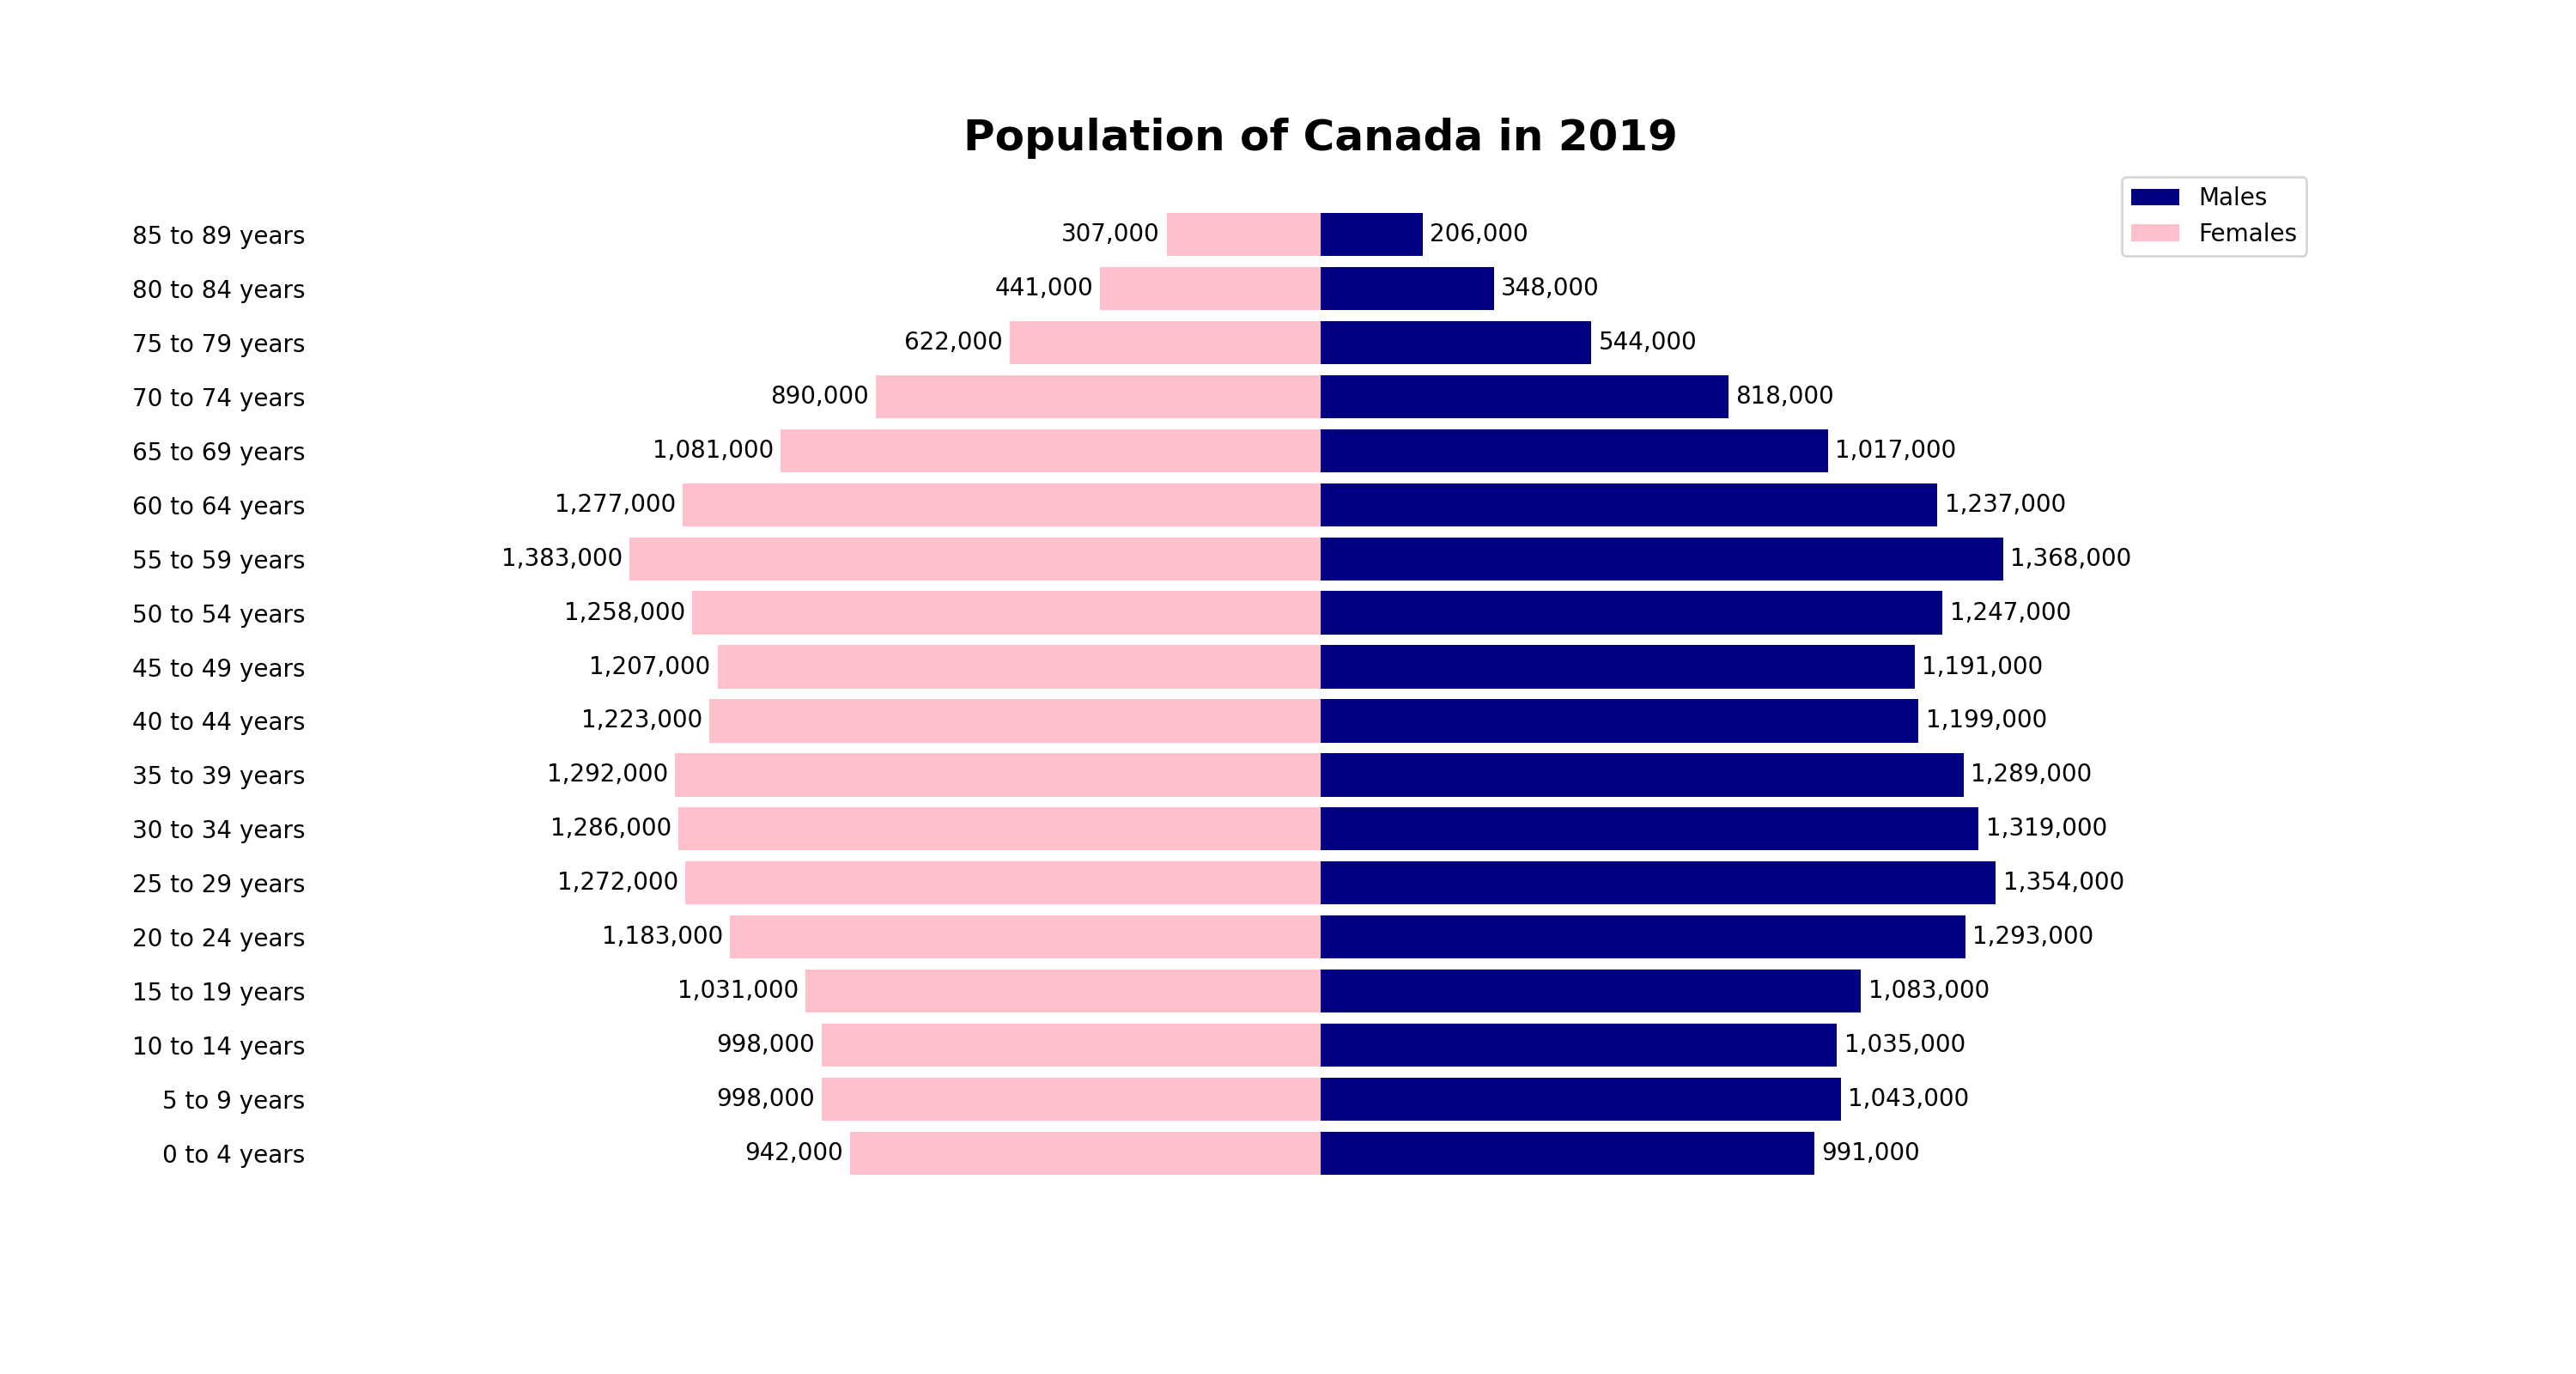

In [46]:
fig, ax = plt.subplots(figsize=(15,8))

def animate(year):
    ax.clear()
    filtered = df[df['Year'] == year]
    males = plt.barh(y=filtered['Age Group'], width = filtered['Males'],color='#000080')
    females = plt.barh(y=filtered['Age Group'], width = filtered['Females'],color='#FFC0CB')

    ax.set_xlim(-2_000_000, 2_000_000)
    ax.bar_label(males, padding=3, labels=[f'{round(value,-3):,}' for value in filtered['Males']])
    ax.bar_label(females, padding=3, labels=[f'{-1*round(value,-3):,}' for value in filtered['Females']])

    for edge in ['top','right','bottom','left']:
        ax.spines[edge].set_visible(False)

    ax.tick_params(left = False)
    ax.get_xaxis().set_visible(False)

    ax.legend([males,females],['Males','Females'])
    ax.set_title(f'Population of Canada in {year}', size=18, weight='bold')

animation = FuncAnimation(fig, animate, frames=range(df['Year'].min(), df['Year'].max()+1))
animation.save('/Users/shanthankasula/Downloads/canadapop_racebarchart.gif', dpi=300, writer=PillowWriter(fps=5))